# 1.

## （1） 直接展开法

In [48]:
def fac(n:int):
    '''return factorial(n) '''
    result = 1
    if n != 0:
        for i in range(1, n + 1):
            result = result * i
    return result


def expansion(x):
    '''return exp(-x), using direct expansion'''
    n = 0
    sum = 0
    while True:
        sum += ((-1) ** n) * (x ** n / fac(n))
        if sum + ((-1) ** n) * (x ** n / fac(n)) == sum : break
        n += 1
    return sum


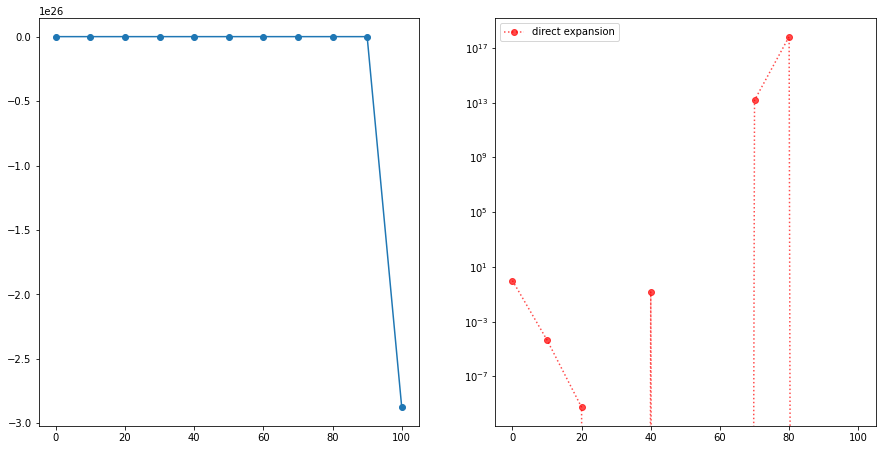

In [49]:
from cmath import log
import matplotlib.pyplot as plt
import numpy as np
import time

x = []
y_1 = []
y_log = []

for i in range(0, 110, 10):
    x.append(i)
    y_1.append(expansion(i))

plt.figure(figsize=(15, 7.5))

plt.subplot(121)
plt.scatter(x, y_1)
plt.plot(x,y_1)

plt.subplot(122)
plt.semilogy(x,
             y_1,
             linewidth=1.5,
             color='red',
             linestyle='dotted',
             label='direct expansion',
             alpha=0.7,
             marker='o')
plt.legend()


plt.show()

上图左图是由直接展开法得到的结果$e^{-x}$，右图是将y取了对数坐标后得到的$\log(e^{-x})$。需要说明的是，此算法在$x\geq30$时，得到的结果$e^{-x}$可能为负数，无法转化为对数，所以右图中会有一些点缺失（具体为$x=30,50,60,90,100$时）。

观察上图可以发现，直接展开法在$x\geq30$时有较为明显的误差。

## （2） 递归法

In [50]:
def s(n,x):
    if n == 0: return 1
    else: return - s(n - 1, x) * x / n

def iteration(x):
    '''return exp(-x), using iteration'''
    sum = 0
    n = 0
    while True:
        sum += s(n, x)
        n += 1
        if sum + s(n, x) == sum: break
    return sum

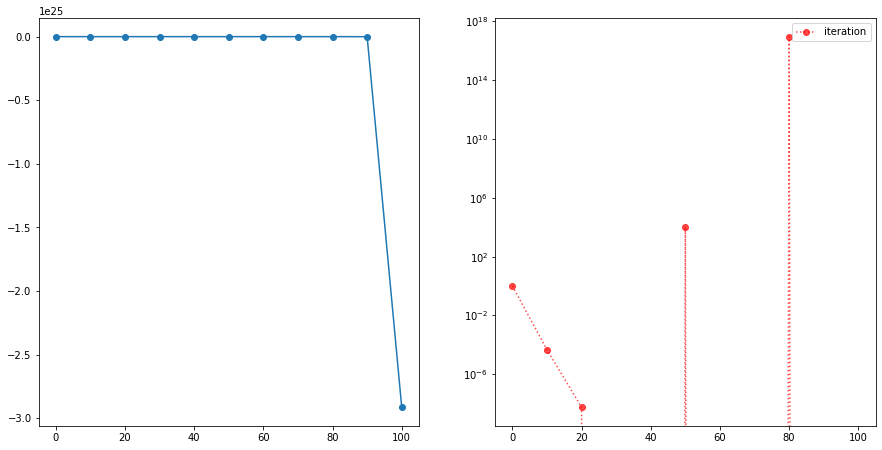

In [51]:
from cmath import log
import math
import matplotlib.pyplot as plt
import numpy as np
import time

x = []
y_2 = []

for i in range(0, 110, 10):
    x.append(i)
    y_2.append(iteration(i))

plt.figure(figsize=(15, 7.5))

plt.subplot(121)
plt.scatter(x, y_2)
plt.plot(x, y_2)

plt.subplot(122)
plt.semilogy(x,
             y_2,
             linewidth=1.5,
             color='red',
             linestyle='dotted',
             label='iteration',
             alpha=0.7,
             marker='o')
plt.legend()
plt.show()


上图左图是由递归法得到的结果$e^{-x}$，右图是将y取了对数坐标后得到的$\log(e^{-x})$。与第一问一样，此算法在$x\geq30$时，得到的结果$e^{-x}$可能为负数，无法转化为对数，所以右图中会有一些点缺失（具体为$x=30,40,60,70,90,100$时）。

观察上图可以发现，直接展开法在$x\geq30$时有较为明显的误差。

理论上，递归法的时间复杂度要低于直接展开法。

## （3） 先利用（2）计算$e^x$，然后求倒数

In [52]:
def s(n, x):
    if n == 0: return 1
    else: return s(n - 1, x) * x / n


def iteration_positive(x):
    '''return exp(x), using iteration'''
    sum = 0
    n = 0
    while True:
        sum += s(n, x)
        n += 1
        if s(n, x) == 0: break
    return sum

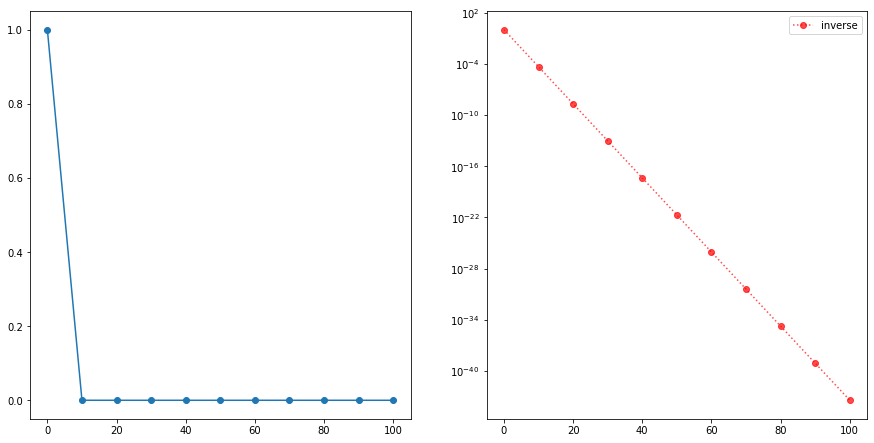

In [53]:
from cmath import log
import matplotlib.pyplot as plt
import numpy as np

x = []
y_3 = []

for i in range(0, 110, 10):
    x.append(i)
    y_3.append(1/iteration_positive(i))
end = time.time()

plt.figure(figsize=(15, 7.5))

plt.subplot(121)
plt.scatter(x, y_3)
plt.plot(x, y_3)

plt.subplot(122)
plt.semilogy(x,
             y_3,
             linewidth=1.5,
             color='red',
             linestyle='dotted',
             label='inverse',
             alpha=0.7,
             marker='o')
plt.legend()

plt.show()

上图左图为运用方法3得到的结果$e^{-x}$，右图是将y取了对数坐标后得到的$\log(e^{-x})$。可以发现这种方法在$x$较大时精度明显提高，而且时间复杂度也与递归法相近。

下面是三种方法求得的$e^{-x}$通过y对数坐标作出的图，可以明显看到方法(3)在精度上的优势。

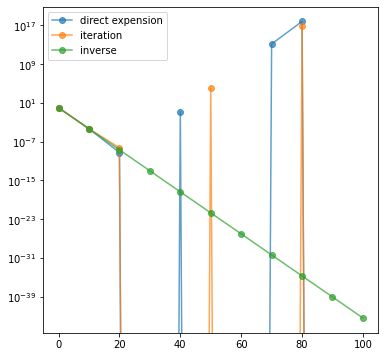

In [54]:
plt.figure(figsize=(6,6))
plt.semilogy(x,
             y_1,
             linewidth=1.5,
             label='direct expension',
             alpha=0.7,
             marker='o')
plt.semilogy(x,
             y_2,
             linewidth=1.5,
             label='iteration',
             alpha=0.7,
             marker='o')
plt.semilogy(x,
             y_3,
             linewidth=1.5,
             label='inverse',
             alpha=0.7,
             marker='o')

plt.legend()
plt.show()

# 2. 矩阵的模和条件数

## (a) 计算A的行列式
上三角矩阵的行列式等于对角元的乘积，因而A的行列式显然是1，所以不是奇异矩阵。 

## (b) 给出A的逆

In [55]:
import numpy as np
def get_A(n):
    '''
    return matix A of n dim
    
    input: n
    output: A of n dim
    '''
    A = np.zeros((n,n))
    for i in range(n):
        A[i, i]=1
        for j in range(i+1,n):
            A[i, j] = -1
    return A

def get_I(n:int):
    '''
    input: n 
    output: I of n dim
    '''
    I = np.zeros((n,n))
    for i in range(n):
        I[i, i]=1
    return I

def get_inverse(A):
    '''
    input: A
    output: A^{-1}
    '''
    n = len(A)
    big_matrix = np.concatenate((A,get_I(n)), axis=1) # 得到和I拼起来的大矩阵
    for i in range(n - 1, -1, -1):
        for j in range(n - 1, i, -1):
            big_matrix[i] += big_matrix[j]
    return big_matrix[:, -n:]

# evaluate
print(get_inverse(get_A(5)))
print(get_inverse(get_A(5)) @ get_A(5))


[[1. 1. 2. 4. 8.]
 [0. 1. 1. 2. 4.]
 [0. 0. 1. 1. 2.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


上述程序给出了$n=5$时，$A^{-1}$的形式，可以看出:
$$
\begin{equation}
A^{-1}
=
\begin{bmatrix}
1 & 1 & 2 & 4 & \dots & 2^{n-2}\\
0 & 1 & 1 & 2 & \dots & 2^{n-3}\\
\vdots & \vdots & \ddots & \ddots & 2 & \vdots\\
0 & 0 & \cdots & 1 & 1 & 2\\
0 & 0 & 0 & \cdots & 1 & 1\\
0 & 0 & 0 & \cdots & 0 & 1
\end{bmatrix}
\end{equation}
$$

### (c) 证明:$\Vert A \Vert_{\infty}=\max\limits_{i}\sum\limits_{j}\vert a_{ij}\vert$
$$
\begin{equation}
\begin{aligned}
\Vert x \Vert_{\infty} &= \max\limits_{i} \vert x_i\vert\\
\Vert Ax \Vert_{\infty} &= \max\limits_{i} \vert\sum\limits_{j}a_{ij}x_{j}\vert\\
\Vert A \Vert_{\infty} &= \sup\limits_{x\neq 0}\frac{\max\limits_{i} \vert\sum\limits_{j}a_{ij}x_{j}\vert}{\max\limits_{i} \vert x_i\vert}\\
&=\max\limits_{i}\sum\limits_{j}\vert a_{ij}\vert\\
\end{aligned}
\end{equation}
$$

等式最后一行需要：取$x$使得$a_{ij}x_{j}$对任意$j$同号，且$\vert x_j\vert$相等。

## (d) 证明
### 1. $\Vert U\Vert_2=\Vert U^{\dagger}\Vert_2=1$

$$
\begin{equation}
\begin{aligned}
\Vert U\Vert_2=\Vert U^{\dagger}\Vert_2 = \left[\rho(U^{\dagger}U)\right]^{\frac{1}{2}}=\left[\rho(I)\right]^{\frac{1}{2}}=1
\end{aligned}
\end{equation}
$$

### 2. 对任意A，$\Vert UA\Vert_2=\Vert A\Vert_2$
$$
\begin{equation}
\begin{aligned}
\Vert UA\Vert_2&=\left[\rho((UA)^{\dagger}UA)\right]^{\frac{1}{2}}=\left[\rho(A^{\dagger}U^{\dagger}UA)\right]^{\frac{1}{2}}=\left[\rho(A^{\dagger}A)\right]^{\frac{1}{2}}=\Vert A\Vert_2
\end{aligned}
\end{equation}
$$


### (e) 计算条件数

$$
\Vert A\Vert_\infty = n
$$
$$
\Vert A^{-1}\Vert_\infty=1+1+2+4+\cdots+2^{n-2}=2^{n-1}
$$
$$
\therefore K_{\infty}(A)=\Vert A\Vert_\infty \Vert A^{-1}\Vert_\infty=n\cdot 2^{n-1}
$$

# 3. Hilbert 矩阵
## (a) 
要使$D$取极小值，说明：
$$
\begin{equation}
\frac{\partial D}{\partial c_i}=0
\end{equation}
$$
同时根据$D$的表达式：
$$
\begin{equation}
\begin{aligned}
\frac{\partial D}{\partial c_j}&=\int_{0}^{1} dx(\sum\limits_{i} c_i x^{i-1}-f(x))^2\\
&=\int_{0}^{1} 2dx (\sum\limits_{i} c_i x^{i-1}-f(x))x^{j-1}\\
&=2\sum\limits_{i} c_i\int_{0}^{1} x^{i+j-2} dx-2\int_{0}^{1} f(x)x^{j-1}dx\\
&=2\sum\limits_{i} c_i\frac{1}{i+j-1}-2\int_{0}^{1} f(x)x^{j-1}dx\\
\end{aligned}
\end{equation}
$$
所以有，(这里更换了一下i和j的符号，并不影响结果)
$$\sum\limits_{j} c_j\frac{1}{i+j-1}=\int_{0}^{1} f(x)x^{i-1}dx$$
令:$(H_n)_{ij}=\frac{1}{i+j-1}, b_i=\int_{0}^{1} f(x)x^{i-1}dx$，则有：
$$\sum\limits_{j} (H_n)_{ij}c_j=b_i$$

## (b) 说明$H_n$是对称的正定矩阵，进而论证它非奇异。
$$
\begin{equation}
\begin{aligned}
c^{T}Hc&=\sum\limits_{i,j} H_{ij}x_ix_j\\
    &=\sum\limits_{i,j} \frac{1}{i+j-1}x_ix_j\\
    &=\int_{0}^{1}\sum\limits_{i,j} x_ix_jt^{i+j-2}dt\\
    &=\int_{0}^{1}\sum\limits_{i,j} (x_it^{i-1})(x_jt^{j-1})dt\\
    &=\int_{0}^{1}(\sum\limits_{i}x_i t^{i-1})^2dt\geq0\\
\end{aligned}
\end{equation}
$$

所以$H_n$为对称的正定矩阵，根据正定矩阵行列式为正，可知$H_n$非奇异。

In [56]:
def Hilbert(n):
    '''
    return hilbert matrix of n dim
    '''
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i][j] = 1 / (i + j + 1)
    return H

## (c) 估计$\det(H_n)$的值
### s1. 直接通过严格表达式计算

In [57]:
# 直接求det(H_n)
def c(n):
    '''
    return c_n
    '''
    result = 1
    for i in range(1, n):
        for j in range(1, i+1): result *= j

    return result

def det_H(n):
    return (c(n)) ** 4 / c(2 * n)


for i in range(1, 11):
    print('when n = ', i, ', det(Hn) = ', det_H(i))

when n =  1 , det(Hn) =  1.0
when n =  2 , det(Hn) =  0.08333333333333333
when n =  3 , det(Hn) =  0.000462962962962963
when n =  4 , det(Hn) =  1.6534391534391535e-07
when n =  5 , det(Hn) =  3.749295132515087e-12
when n =  6 , det(Hn) =  5.367299887358688e-18
when n =  7 , det(Hn) =  4.835802623926117e-25
when n =  8 , det(Hn) =  2.737050113791513e-33
when n =  9 , det(Hn) =  9.720234311925e-43
when n =  10 , det(Hn) =  2.164179226431492e-53


### s2. 通过对严格表达式取对数降低复杂度
对$det(H_n)$取对数：
$$\log (\det(H_n)) = 4 \log(c_n) - \log(c_{2n})$$

$$
\begin{aligned}
\log(c_n)&=\log1+(\log1+\log2)+(\log1+\log2+\log3)+…+(\log1+…\log(n-1))\\
&=(n-1)\log1+(n-2)\log2+…+(n-(n-1))\log(n-1)
\end{aligned}
$$


In [58]:
# 通过取对数求det(Hn)
def log_c(n):
    result = 0
    for i in range(1,n): result += (n-i) * np.log10(i)
    return result

def log_det_H(n):
    return 4 * log_c(n) - log_c(2 * n)

def get_from_log_det_H(n):
    return 10 ** log_det_H(n)

for i in range(1,11):
    print('when n = ', i ,', det(Hn) = ',get_from_log_det_H(i))

when n =  1 , det(Hn) =  1.0
when n =  2 , det(Hn) =  0.08333333333333333
when n =  3 , det(Hn) =  0.0004629629629629632
when n =  4 , det(Hn) =  1.6534391534391535e-07
when n =  5 , det(Hn) =  3.74929513251509e-12
when n =  6 , det(Hn) =  5.367299887358741e-18
when n =  7 , det(Hn) =  4.835802623926148e-25
when n =  8 , det(Hn) =  2.7370501137914296e-33
when n =  9 , det(Hn) =  9.720234311925259e-43
when n =  10 , det(Hn) =  2.164179226431472e-53


### (d) 比较 GEM 和 Cholesky 分解求解线性方程 $H_n \cdot x = b$

In [59]:
def Hilbert(n):
    '''
    return hilbert matrix of n dim
    '''
    H = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            H[i][j] = 1 / (i + j + 1)
    return H

In [60]:
def GEM(H):
    '''
    return solution x of H * x = b through Gauss Elimination Method
    '''
    # 通过初等变换将矩阵化为上三角矩阵
    n = len(H)
    # 此后的H均指增广矩阵
    H = np.concatenate((H, np.ones((n, 1))), axis=1)
    for i in range(n):
        if i == 0: H[i] = H[i] / H[i, i]
        else:
            assert H[i - 1, i - 1] == 1
            for j in range(i):
                H[i] = H[i] - H[j] * H[i, j]
                H[i] = H[i] / H[i, i]
    # 将上三角增广矩阵通过初等变换转化为对角矩阵
    for i in range(n - 2, -1, -1):
        for j in range(n - 1, i, -1):
            H[i] = H[i] - H[j] * H[i, j]
    return H[:, n]


In [61]:
def Cholesky(H):
    '''
    return solution x of H * x = b through Cholesky decomposition
    '''
    # cholesky decomposition
    n = len(H)
    for j in range(1, n + 1):
        for k in range(1, j):
            H[j - 1, j - 1] -= H[j - 1, k - 1]**2
        H[j - 1, j - 1] = H[j - 1, j - 1]**(1 / 2)
        for i in range(j + 1, n + 1):
            for k in range(1, j):
                H[i - 1, j - 1] -= H[i - 1, k - 1] * H[j - 1, k - 1]
            H[i - 1, j - 1] = H[i - 1, j - 1] / H[j - 1, j - 1]
    for i in range(n):
        for j in range(i + 1, n):
            H[i, j] = 0

    # 此时 H 是一个下三角矩阵
    L = H
    # 求 L y = b
    L = np.concatenate((H, np.ones((n, 1))), axis=1)
    for i in range(n):
        if i == 0: L[i] = L[i] / L[i, i]
        else:
            assert L[i - 1, i - 1] == 1
            for j in range(i):
                L[i] = L[i] - L[j] * L[i, j]
                L[i] = L[i] / L[i, i]
    y = L[:, n]

    # 下面求 H.T x = y
    Lt = H.T
    Lt = np.concatenate((Lt, np.ones((n, 1))), axis=1)
    for i in range(n):
        Lt[i][n] = y[i]
    for i in range(n):
        Lt[i] = Lt[i] / Lt[i, i]
    for i in range(n - 2, -1, -1):
        for j in range(n - 1, i, -1):
            Lt[i] = Lt[i] - Lt[j] * Lt[i, j]

    return Lt[:, n]


for i in range(1, 11):
    H = Hilbert(i)
    print('n = ', i)
    print('GEM :', GEM(H))
    print('Cho :', Cholesky(H))


n =  1
GEM : [1.]
Cho : [1.]
n =  2
GEM : [-2.  6.]
Cho : [-2.  6.]
n =  3
GEM : [  3. -24.  30.]
Cho : [  3. -24.  30.]
n =  4
GEM : [  -4.   60. -180.  140.]
Cho : [  -4.   60. -180.  140.]
n =  5
GEM : [    5.  -120.   630. -1120.   630.]
Cho : [    5.  -120.   630. -1120.   630.]
n =  6
GEM : [-6.000e+00  2.100e+02 -1.680e+03  5.040e+03 -6.300e+03  2.772e+03]
Cho : [-6.000e+00  2.100e+02 -1.680e+03  5.040e+03 -6.300e+03  2.772e+03]
n =  7
GEM : [ 7.00000003e+00 -3.36000001e+02  3.78000001e+03 -1.68000000e+04
  3.46500001e+04 -3.32640001e+04  1.20120000e+04]
Cho : [ 7.00000004e+00 -3.36000002e+02  3.78000002e+03 -1.68000001e+04
  3.46500001e+04 -3.32640001e+04  1.20120000e+04]
n =  8
GEM : [-7.99999961e+00  5.03999976e+02 -7.55999966e+03  4.61999980e+04
 -1.38599994e+05  2.16215992e+05 -1.68167994e+05  5.14799982e+04]
Cho : [-7.99999983e+00  5.03999988e+02 -7.55999982e+03  4.61999989e+04
 -1.38599997e+05  2.16215995e+05 -1.68167997e+05  5.14799990e+04]
n =  9
GEM : [ 8.99993240e+00 

可以看出，GEM算法与Cholesky算法在n较小时，给出的解一致，在n较大时，给出的解有些许偏差。我认为Cholesky算法精度更高，因为Cholesky分解对正定的厄米矩阵稳定性极佳。


# 4.级数求和与截断误差
### (a) 请求出 $f (q^2)$ 在 $q^2 = 0.5$ 处的值

$$
\begin{equation}
f(q^2)=(\sum\limits_{\vec{n}\in\mathbb{Z}^3}-\int d^3 \vec{n})\frac{1}{\vert\vec{n}\vert^2-q^2}
\end{equation}
$$
其中积分可以写出解析表达式，
$$
\begin{equation}
\begin{aligned}
\int d^3 \vec{n}\frac{1}{\vert\vec{n}\vert^2-q^2} &= \int 4\pi r^2dr\frac{1}{r^2-q^2}\\
&=4\pi\int(1+\frac{q^2}{r^2-q^2})dr\\
&=4\pi r+4\pi q \int\frac{1}{(\frac{r}{q})^2-1}d(\frac{r}{q})\\
&=\begin{cases}
    4\pi r- 4\pi q \tanh^{-1}(\frac{r}{q}) & r< q\\
    4\pi r- 4\pi q \tanh^{-1}(\frac{q}{r}) & r\geq q\\
\end{cases}
\end{aligned}
\end{equation}
$$

因而:
$$
f(q^2)=\sum\limits_{\vec{n}\in\mathbb{Z}^3}\frac{1}{\vert\vec{n}\vert^2-q^2}-4\pi(\Lambda-q\tanh^{-1}(\frac{q}{\Lambda}))
$$
下面用python和c++编写程序来计算上式。

In [62]:
# python version
from cmath import tanh
import math
import numpy as np
from tqdm import tqdm

r = 100
q2 = 0.5
q = q2**(0.5)
sum = 0

for x in tqdm(range(-r, r + 1)):
    ylim = int((r**2 - x**2)**(0.5))
    for y in range(-ylim, ylim + 1):
        zlim = int((r**2 - x**2 - y**2)**(0.5))
        for z in range(-zlim, zlim + 1):
            sum += 1 / (x**2 + y**2 + z**2 - q2)

print('series = ', sum)

inter = 4 * math.pi * (r - q * np.arctanh(q / r))

print('integral = ', inter)
print(sum - inter)


100%|██████████| 201/201 [00:05<00:00, 37.71it/s]

series =  1257.5870842531626
integral =  1256.5742285356166
1.0128557175460173


由于python运行速度较慢，改用c++编写程序如下：

（程序放在[q4.cpp](q4.cpp)）

---

```cpp
#include <iostream>
#include <cmath>
using namespace std;
int main()
{
    int r = 8000;
    float q2 = 0.5;
    double sum = 0;
    double q = sqrt(q2);
    for (int x = -r; x < r + 1; x++)
    {
        if (x % 500 == 0)
        {
            cout << x << endl;
        }
        int ylim = sqrt(r * r - x * x);
        for (int y = -ylim; y < ylim + 1; y++)
        {
            int zlim = sqrt(r * r - x * x - y * y);
            for (int z = -zlim; z < zlim + 1; z++)
            {
                sum = sum + 1 / (x * x + y * y + z * z - q2);

            }
        }
    }
    double pi = 3.14159265358979;
    double inter = 4 * pi * (r - q * atanh(q / r));
    cout << sum << endl;
    cout << inter << endl;
    cout << (sum - inter) << endl;

    return 0;
}
```
---


c++的运行到$\Lambda=1000$的结果为，$f=1.09745$。

结果约为$1.1$。

## (b) 引入$\Lambda$需要多大可以使$f$精度达到$10^{-5}$?
大约需要$\Lambda$达到$10^5$数量级。

## (c)


我们可以发现，原先主要的计算复杂度源于我们试图对三维矢量$\vec{n}$求和，可以将其转化为对$\vert \vec{n}\vert^2 $求和，即

$$
\sum\limits_{\vec{n}\in\mathbb{Z}^3}\frac{1}{\vert\vec{n}\vert^2-q^2}=\sum\limits_{r^2\leq\Lambda^2}\frac{c(r^2)}{r^2-q^2}\xlongequal{r^2\triangleq\Alpha}\sum\limits_{\Alpha\leq\Lambda^2}\frac{c'(\Alpha)}{\Alpha-q^2}
$$



要计算右式，计算复杂度主要在于对于每一个$\Alpha$，如何计算其系数$c'(\Alpha)$.$c'(\Alpha)$代表着$\Alpha$有多少种分解方式可以分解成三个有序整数的平方和。有两种思路：第一种是分解的思路，对$A$从1遍历到$\Lambda^2$，判断$A$是否可分解；第二种是组合的思路，从0到$\Lambda$，看这些数能够生成多少种无序三元组。不幸的是，第一种思路的计算复杂度比原先的做法还要高，因此采取第二种思路。

第三种思路需要分类讨论：我们考虑第一卦限中的格点$(x,y,z)$
* 1. $x,y,z\neq 0$
  * $x,y,z$均不相等
  
    --> 在$1\to\Lambda$中抽取三个数：$O(\Lambda)\sim C_\Lambda^{3}$
    
    这个情况下$\Alpha = x^2+y^2+z^2$在一个卦限内需要被重复计算6次
  * $x,y,z$中有两个相等
  
    --> 在$1\to\Lambda$中抽取两个数：$O(\Lambda)\sim C_\Lambda^{2}$

    这个情况下$\Alpha = x^2+y^2+z^2$在一个卦限内需要被重复计算3次

  * $x,y,z$均相等
  
    --> 在$1\to\Lambda$中抽取一个数：$O(\Lambda)\sim C_\Lambda^{1}=\Lambda$
    
    这个情况下$\Alpha = x^2+y^2+z^2$在一个卦限内需要被重复计算1次
* 2. $x,y,z$中有数为0
  * 此情况中的计算复杂度远低于上面的，在$\Lambda$极大时可以略去
  
综上，可以发现这个方法的复杂度在$O(\Lambda)\sim C_\Lambda^{3}$